In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

plt.style.use('seaborn-dark-palette')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

# Geo data of Portugal

In [4]:
# concelhos = pd.read_csv('../data/geo_data/concelhos.csv', encoding='utf-16')
# concelhos.head()

In [9]:
distritos = gpd.read_file('../data/geo_data/portugal/distritos_shape.shp')
distritos

,Name,geometry
0,Évora,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466..."
1,Aveiro,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40..."
2,Beja,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37..."
3,Braga,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543..."
4,Bragança,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859..."
5,Castelo Branco,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438..."
6,Coimbra,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153..."
7,Faro,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36..."
8,Guarda,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40..."
9,Leiria,"MULTIPOLYGON (((-9.50597 39.42181, -9.50597 39..."


# Tourism

In [12]:
tourism = pd.read_excel('../data/population/portugal/turismo_by_distrito.xlsx')
tourism.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,20082,29712,33058,42145,49789,52679,62484
1,Açores,107052,121080,140407,169402,199269,222553,240588
2,Beja,5477,15330,19751,22623,27106,29187,35056
3,Braga,27992,36721,41209,48416,58852,66479,76363
4,Bragança,4519,6002,7280,8121,8673,10128,11473


In [14]:
df = distritos.merge(tourism, how='inner', left_on='Name', right_on='Distrito').drop(columns={'Name'})
df.head()

,geometry,Distrito,2013,2014,2015,2016,2017,2018,2019
0,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",Évora,18023,26287,33328,38979,48606,53063,59016
1,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,20082,29712,33058,42145,49789,52679,62484
2,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,5477,15330,19751,22623,27106,29187,35056
3,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543...",Braga,27992,36721,41209,48416,58852,66479,76363
4,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859...",Bragança,4519,6002,7280,8121,8673,10128,11473


In [15]:
anos =[2013, 2014, 2015, 2016, 2017, 2018, 2019]

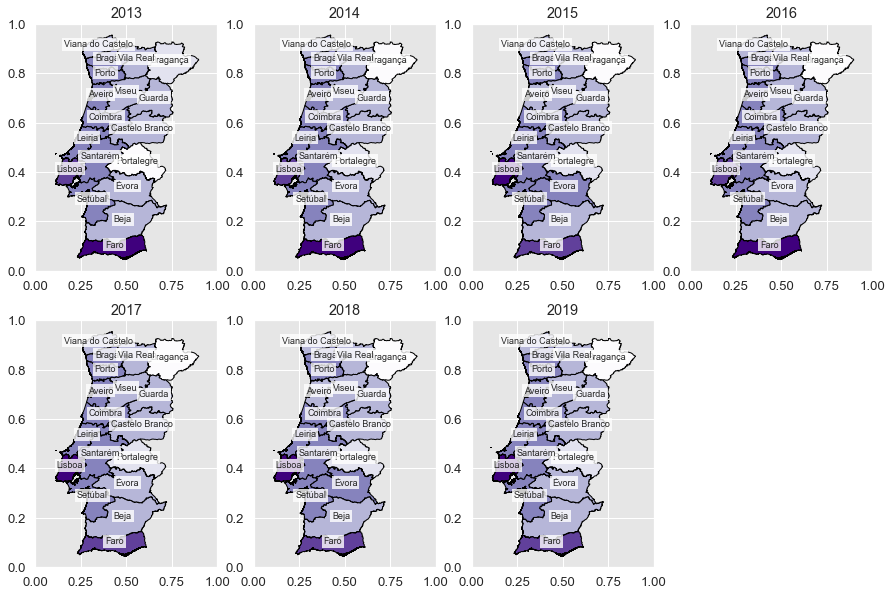

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
plt.axis('off')
for i in range(7): 
    ax = fig.add_subplot(2, 4, i+1)
    df_anos = df.copy().drop(columns=anos[i+1:7])
    if i > 0:
         df_anos = df_anos.drop(columns= anos[0:i]) 
    df_anos = df_anos.rename(columns={anos[i]:'Consumption'})
    f = df_anos.plot(column='Consumption', ax=ax, cmap="Purples", scheme='Percentiles', edgecolor='black', legend=False, aspect='equal').set_title(anos[i])
    df_anos.apply(lambda x: ax.annotate(text=x['Distrito'], xy=x.geometry.centroid.coords[0], ha='center', size=9, bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}), axis=1)
    plt.axis('off')
fig.add_axes(ax)
# fig.suptitle('Yearly total incomes of tourist accommodations by region', fontsize=16)
plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("../charts/portugal/yearly_total_tourists_accommodation_by_region.png", bbox_inches='tight')

# Water

In [30]:
water = pd.read_excel('../data/water/portugal/water_consumption_by_district.xlsx')
water.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,620.2,622.3,642.4,660.8,700.7,706.6,716.4
1,Beja,665.2,662.8,677.1,671.5,712.7,693.7,720.0
2,Braga,361.5,381.4,527.5,410.6,437.6,433.6,451.9
3,Bragança,548.9,582.8,584.0,531.7,538.0,527.1,500.8
4,Castelo Branco,433.7,441.7,487.4,470.9,461.6,399.3,400.8


In [48]:
df = distritos.merge(water, how='inner', left_on='Name', right_on='Distrito').drop(columns={'Name'})
df

,geometry,Distrito,2013,2014,2015,2016,2017,2018,2019
0,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",Évora,686.2,658.1,736.6,721.4,683.2,672.7,718.3
1,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,620.2,622.3,642.4,660.8,700.7,706.6,716.4
2,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,665.2,662.8,677.1,671.5,712.7,693.7,720.0
3,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543...",Braga,361.5,381.4,527.5,410.6,437.6,433.6,451.9
4,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859...",Bragança,548.9,582.8,584.0,531.7,538.0,527.1,500.8
5,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438...",Castelo Branco,433.7,441.7,487.4,470.9,461.6,399.3,400.8
6,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153...",Coimbra,780.2,776.5,839.7,849.7,889.2,827.9,879.1
7,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36...",Faro,1166.8,1165.9,1248.2,1474.0,1458.3,1354.5,1504.4
8,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40...",Guarda,656.2,609.5,677.2,700.7,702.9,676.8,706.1
9,"MULTIPOLYGON (((-9.50597 39.42181, -9.50597 39...",Leiria,418.0,393.3,416.4,416.3,440.9,423.7,456.7


In [49]:
df_2013 = df.copy().drop(columns={2014, 2015, 2016, 2017, 2018, 2019})
df_2013 = df_2013.rename(columns={2013:'Consumption'})
df_2013

,geometry,Distrito,Consumption
0,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",Évora,686.2
1,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,620.2
2,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,665.2
3,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543...",Braga,361.5
4,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859...",Bragança,548.9
5,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438...",Castelo Branco,433.7
6,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153...",Coimbra,780.2
7,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36...",Faro,1166.8
8,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40...",Guarda,656.2
9,"MULTIPOLYGON (((-9.50597 39.42181, -9.50597 39...",Leiria,418.0


In [56]:
anos =[2013, 2014, 2015, 2016, 2017, 2018, 2019]

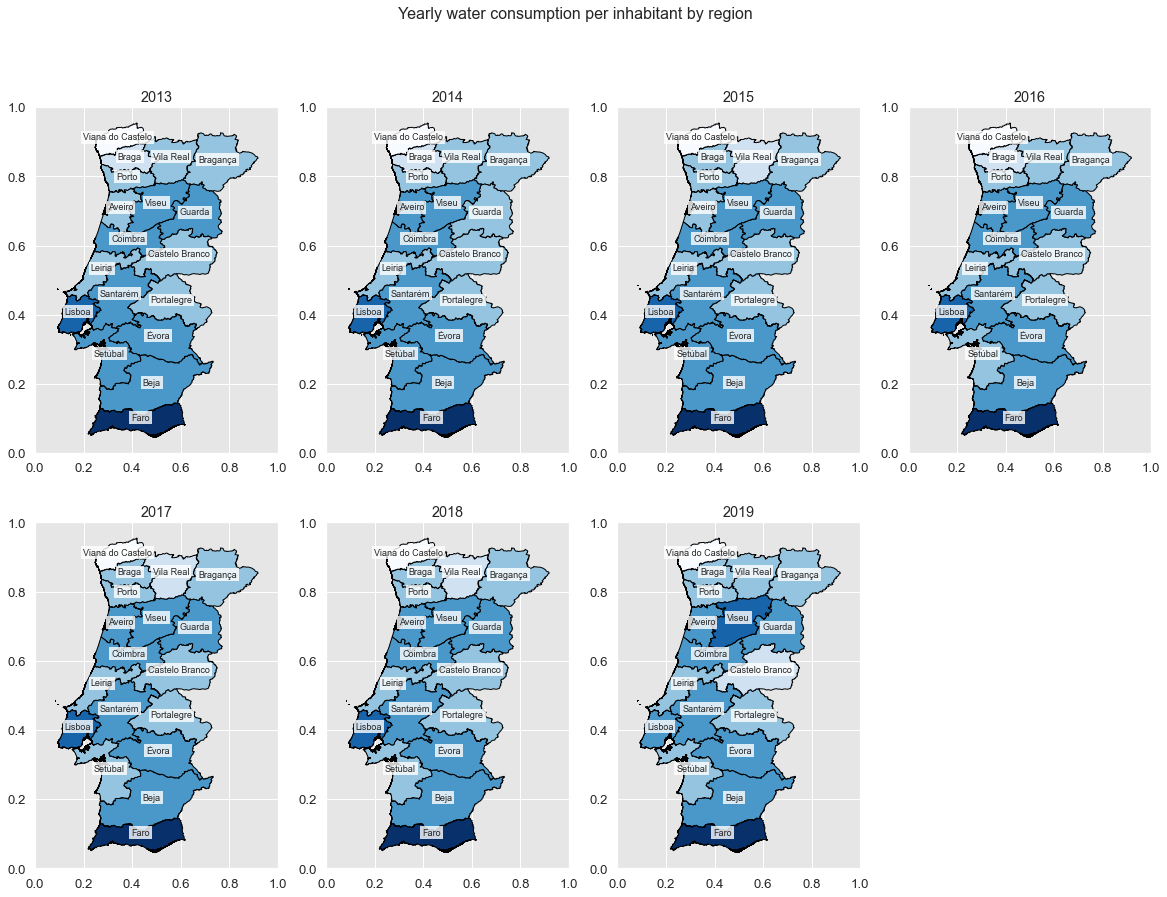

In [99]:
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
plt.axis('off')
for i in range(7): 
    ax = fig.add_subplot(2, 4, i+1)
    df_anos = df.copy().drop(columns=anos[i+1:7])
    if i > 0:
         df_anos = df_anos.drop(columns= anos[0:i]) 
    df_anos = df_anos.rename(columns={anos[i]:'Consumption'})
    f = df_anos.plot(column='Consumption', ax=ax, cmap="Blues", scheme='Percentiles', edgecolor='black', legend=False, aspect='equal').set_title(anos[i])
    df_anos.apply(lambda x: ax.annotate(text=x['Distrito'], xy=x.geometry.centroid.coords[0], ha='center', size=9, bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}), axis=1)
    plt.axis('off')
fig.add_axes(ax)
fig.suptitle('Yearly water consumption per inhabitant by region', fontsize=16)
plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("../charts/portugal/yearly_water_consumption_by_region.png", bbox_inches='tight')

In [107]:
total_water = pd.read_excel('../data/water/portugal/total_water_consumption_by_district.xlsx')
total_water.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,26224,25920,27203,27608,29170,29114,29688
1,Beja,8384,8255,8422,8280,8770,8527,8880
2,Braga,30444,29625,30971,31758,33590,33006,33203
3,Bragança,8652,9217,9358,9236,9203,8902,8815
4,Castelo Branco,10666,10716,11391,11257,11546,10861,10757


In [108]:
df_3 = distritos.merge(total_water, how='inner', left_on='Name', right_on='Distrito').drop(columns={'Name'})
df_3.head()

,geometry,Distrito,2013,2014,2015,2016,2017,2018,2019
0,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",Évora,10633,10308,11300,11231,10739,10244,10826
1,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,26224,25920,27203,27608,29170,29114,29688
2,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,8384,8255,8422,8280,8770,8527,8880
3,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543...",Braga,30444,29625,30971,31758,33590,33006,33203
4,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859...",Bragança,8652,9217,9358,9236,9203,8902,8815


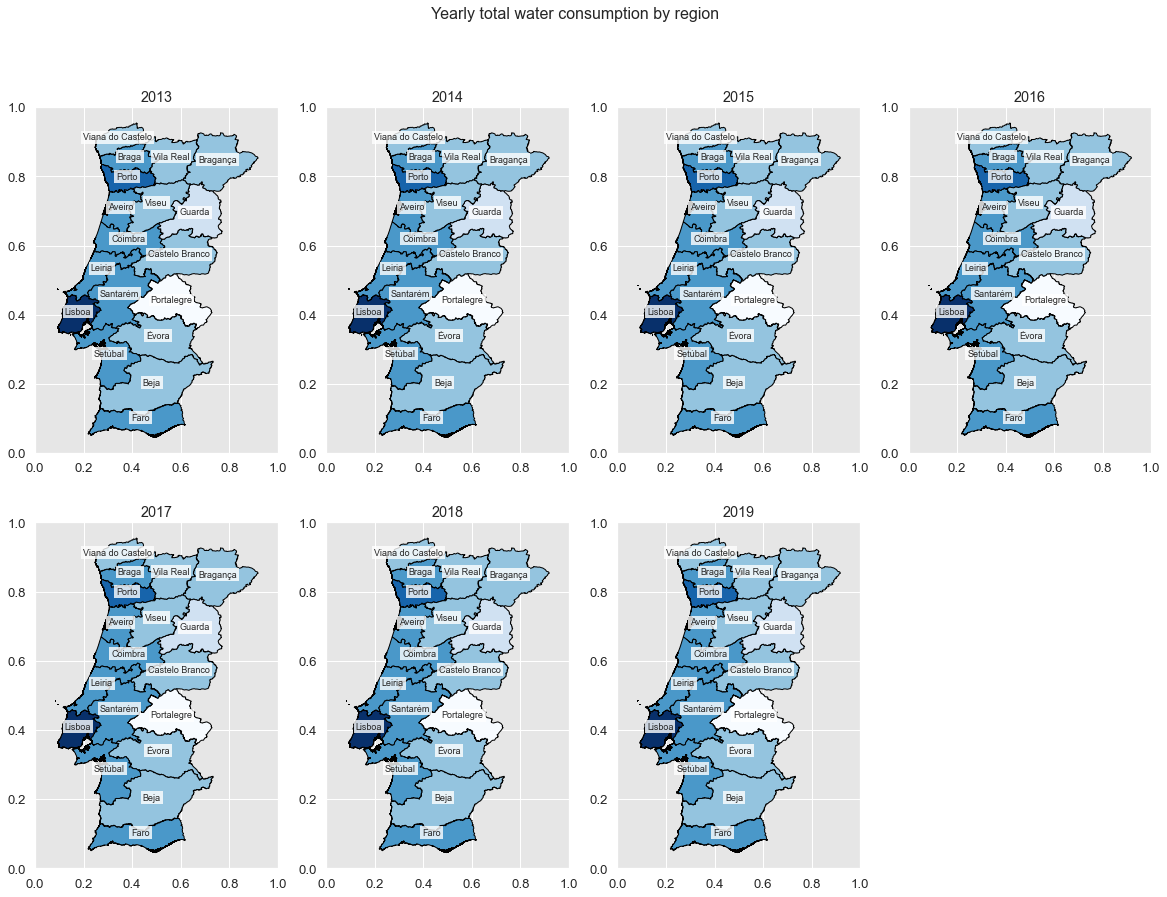

In [109]:
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
plt.axis('off')
for i in range(7): 
    ax = fig.add_subplot(2, 4, i+1)
    df_anos = df_3.copy().drop(columns=anos[i+1:7])
    if i > 0:
         df_anos = df_anos.drop(columns= anos[0:i]) 
    df_anos = df_anos.rename(columns={anos[i]:'Consumption'})
    f = df_anos.plot(column='Consumption', ax=ax, cmap="Blues", scheme='Percentiles', edgecolor='black', legend=False, aspect='equal').set_title(anos[i])
    df_anos.apply(lambda x: ax.annotate(text=x['Distrito'], xy=x.geometry.centroid.coords[0], ha='center', size=9, bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}), axis=1)
    plt.axis('off')
fig.add_axes(ax)
fig.suptitle('Yearly total water consumption by region', fontsize=16)
plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("../charts/portugal/yearly_total_water_consumption_by_region.png", bbox_inches='tight')

# Electricity

In [103]:
anos = [2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [104]:
el = pd.read_excel('../data/electricity/portugal/el_consumption_per_capita_by_district.xlsx')
el.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019,2020
0,Aveiro,95068.3,98185.2,102134.5,103346.9,105032.3,112834.3,112227.2,106217.1
1,Açores,45919.0,46086.2,47159.3,49623.6,50206.6,50913.1,50870.9,49628.9
2,Beja,91584.9,94044.0,100837.5,103539.1,108704.3,115396.8,123256.0,119859.4
3,Braga,43130.5,42839.9,44358.9,46041.8,46408.6,47582.6,47377.0,45669.1
4,Bragança,35040.8,34246.8,35589.8,36327.8,36681.8,38963.9,40952.6,38758.3


In [105]:
df_2 = distritos.merge(el, how='inner', left_on='Name', right_on='Distrito').drop(columns={'Name'})
df_2

,geometry,Distrito,2013,2014,2015,2016,2017,2018,2019,2020
0,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",Évora,51708.8,52340.6,58397.6,60397.9,66190.6,64448.9,65591.2,67111.8
1,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,95068.3,98185.2,102134.5,103346.9,105032.3,112834.3,112227.2,106217.1
2,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,91584.9,94044.0,100837.5,103539.1,108704.3,115396.8,123256.0,119859.4
3,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543...",Braga,43130.5,42839.9,44358.9,46041.8,46408.6,47582.6,47377.0,45669.1
4,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859...",Bragança,35040.8,34246.8,35589.8,36327.8,36681.8,38963.9,40952.6,38758.3
5,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438...",Castelo Branco,86182.0,89078.6,92545.5,98256.2,107653.9,128074.6,116142.4,119310.4
6,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153...",Coimbra,75634.9,77422.9,78593.5,79233.4,79932.6,81342.0,82128.5,80816.2
7,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36...",Faro,70834.2,71078.8,73489.6,77051.6,78417.0,80588.5,81880.1,71810.6
8,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40...",Guarda,38405.0,38482.5,39360.9,41812.9,41373.7,43499.5,42705.5,41721.9
9,"MULTIPOLYGON (((-9.50597 39.42181, -9.50597 39...",Leiria,72523.9,73678.9,75463.4,75133.8,74781.8,76839.7,79445.9,74503.8


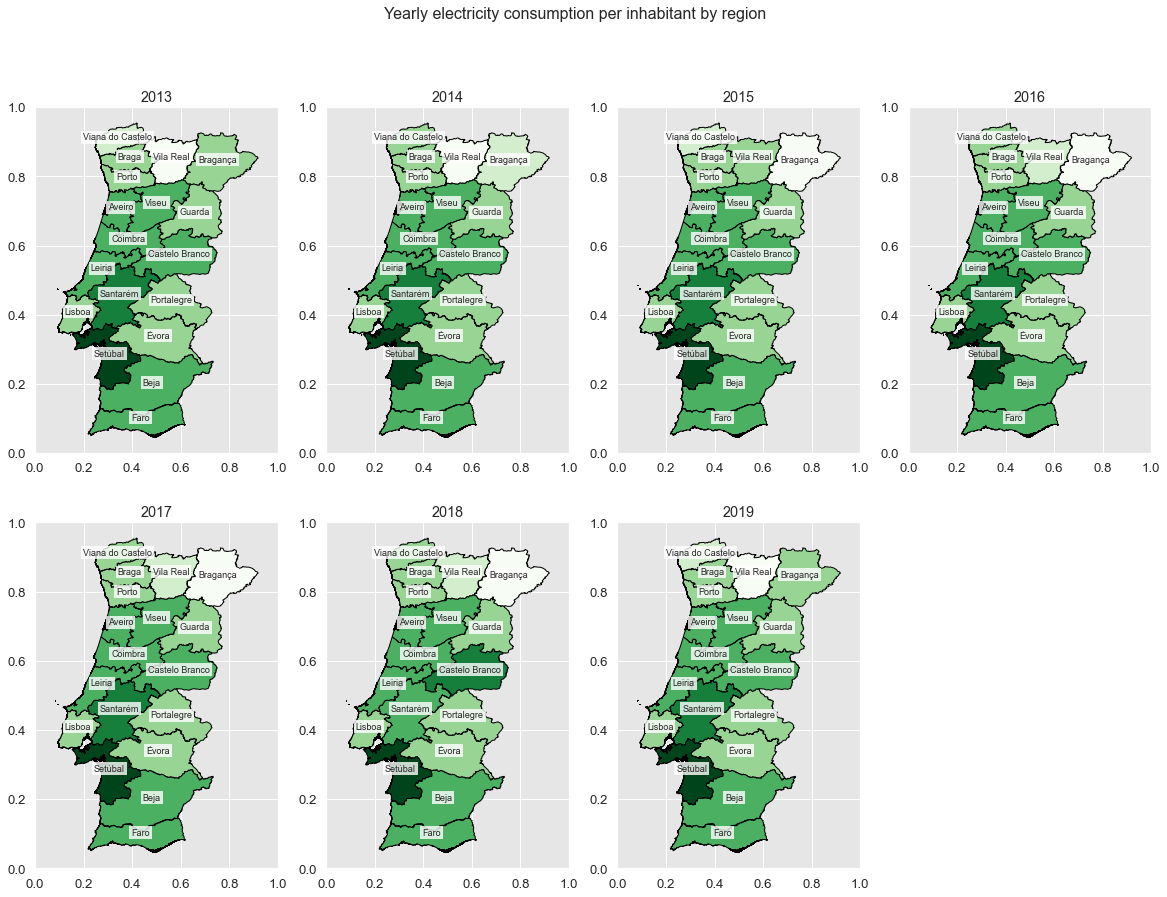

In [106]:
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
plt.axis('off')
for i in range(7): 
    ax = fig.add_subplot(2, 4, i+1)
    df_anos = df_2.copy().drop(columns=anos[i+1:7])
    if i > 0:
         df_anos = df_anos.drop(columns= anos[0:i]) 
    df_anos = df_anos.rename(columns={anos[i]:'Consumption'})
    f = df_anos.plot(column='Consumption', ax=ax, cmap="Greens", scheme='Percentiles', edgecolor='black', legend=False, aspect='equal').set_title(anos[i])
    df_anos.apply(lambda x: ax.annotate(text=x['Distrito'], xy=x.geometry.centroid.coords[0], ha='center', size=9, bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}), axis=1)
    plt.axis('off')
fig.add_axes(ax)
fig.suptitle('Yearly electricity consumption per inhabitant by region', fontsize=16)
plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("../charts/portugal/yearly_electricity_consumption_by_region.png", bbox_inches='tight')

In [110]:
el_dom = pd.read_excel('../data/electricity/portugal/el_consumption_domestic_by_district.xlsx')
el_dom.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,778720060,865895425,866809074,875545569,826032429,865751522,847597260
1,Açores,261478554,258057724,260714465,267143204,265055539,270278613,273618964
2,Beja,165994661,177779408,180390158,182226597,176840996,183992335,183025592
3,Braga,897186659,954513022,949280833,980741127,939424471,991035164,969695981
4,Bragança,157872352,168485239,165138017,168508730,160159271,164195561,162050759


In [111]:
df_2 = distritos.merge(el_dom, how='inner', left_on='Name', right_on='Distrito').drop(columns={'Name'})
df_2

,geometry,Distrito,2013,2014,2015,2016,2017,2018,2019
0,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",Évora,223550027,225412724,225037941,231827257,221516373,234016074,227802368
1,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,778720060,865895425,866809074,875545569,826032429,865751522,847597260
2,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,165994661,177779408,180390158,182226597,176840996,183992335,183025592
3,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543...",Braga,897186659,954513022,949280833,980741127,939424471,991035164,969695981
4,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859...",Bragança,157872352,168485239,165138017,168508730,160159271,164195561,162050759
5,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438...",Castelo Branco,234129857,234751753,237440281,245092677,229784378,240288279,235378858
6,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153...",Coimbra,503804591,526223156,523970816,526333912,502860977,522512439,508787648
7,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36...",Faro,792927543,817038525,843942207,885093280,889960709,941651069,930593234
8,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40...",Guarda,169367990,175787815,174949290,181529710,169655119,174322587,170477756
9,"MULTIPOLYGON (((-9.50597 39.42181, -9.50597 39...",Leiria,542671924,622451080,620671894,617452146,592332605,617818195,610223214


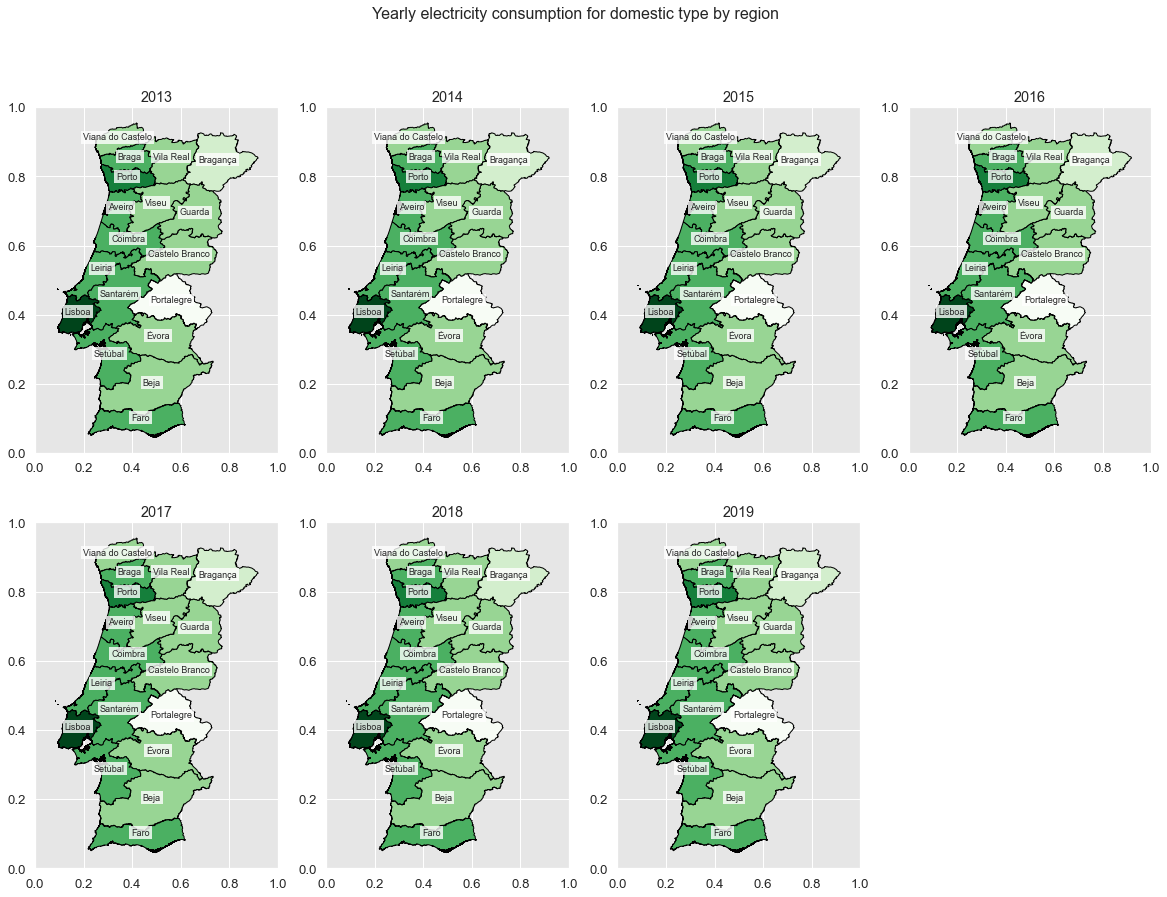

In [112]:
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
plt.axis('off')
for i in range(7): 
    ax = fig.add_subplot(2, 4, i+1)
    df_anos = df_2.copy().drop(columns=anos[i+1:7])
    if i > 0:
         df_anos = df_anos.drop(columns= anos[0:i]) 
    df_anos = df_anos.rename(columns={anos[i]:'Consumption'})
    f = df_anos.plot(column='Consumption', ax=ax, cmap="Greens", scheme='Percentiles', edgecolor='black', legend=False, aspect='equal').set_title(anos[i])
    df_anos.apply(lambda x: ax.annotate(text=x['Distrito'], xy=x.geometry.centroid.coords[0], ha='center', size=9, bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}), axis=1)
    plt.axis('off')
fig.add_axes(ax)
fig.suptitle('Yearly electricity consumption for domestic type by region', fontsize=16)
plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("../charts/portugal/yearly_electricity_consumption_domestic_by_region.png", bbox_inches='tight')

In [113]:
el_ind = pd.read_excel('../data/electricity/portugal/el_consumption_industry_by_district.xlsx')
el_ind.head()

,Distrito,2013,2014,2015,2016,2017,2018,2019
0,Aveiro,2140528717,2198421617,2322444087,2363882776,2469136148,2664301939,2688367584
1,Açores,110277442,104941597,112525599,131587690,127304117,126899544,124792583
2,Beja,399725596,452763798,482677742,496649567,530816881,561928751,621417727
3,Braga,1289127010,1371702090,1426735054,1481729199,1538107108,1546646467,1507838111
4,Bragança,57738540,43523617,47969264,48272490,54143600,69192379,88797487


In [114]:
df_2 = distritos.merge(el_ind, how='inner', left_on='Name', right_on='Distrito').drop(columns={'Name'})
df_2

,geometry,Distrito,2013,2014,2015,2016,2017,2018,2019
0,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",Évora,153353187,177309772,203568819,209081435,244618018,232640629,238056354
1,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,2140528717,2198421617,2322444087,2363882776,2469136148,2664301939,2688367584
2,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,399725596,452763798,482677742,496649567,530816881,561928751,621417727
3,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543...",Braga,1289127010,1371702090,1426735054,1481729199,1538107108,1546646467,1507838111
4,"POLYGON ((-6.79995 41.98915, -6.79787 41.98859...",Bragança,57738540,43523617,47969264,48272490,54143600,69192379,88797487
5,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438...",Castelo Branco,308277525,338041970,338563847,354577136,386415991,454829477,402632240
6,"POLYGON ((-8.71904 40.47155, -8.71902 40.47153...",Coimbra,1719231583,1742027062,1737272837,1699293610,1718969707,1724006156,1745021769
7,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36...",Faro,191859548,201510356,212545720,204587539,208302977,211333000,225351036
8,"MULTIPOLYGON (((-7.40951 40.92181, -7.40192 40...",Guarda,95155200,101822700,106578863,112823824,114669234,113293714,115177358
9,"MULTIPOLYGON (((-9.50597 39.42181, -9.50597 39...",Leiria,1079409190,1105553765,1135808245,1159712213,1210131463,1225032518,1216394844


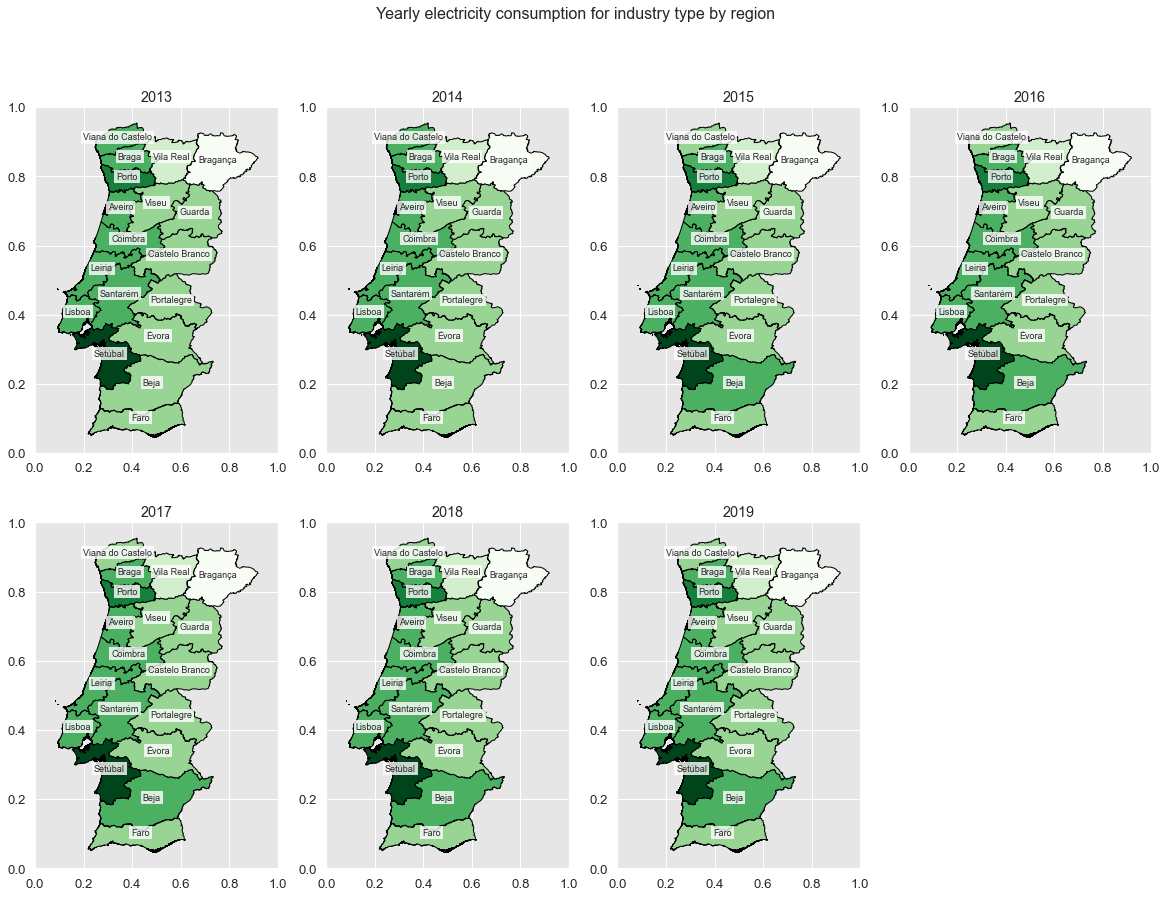

In [115]:
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
plt.axis('off')
for i in range(7): 
    ax = fig.add_subplot(2, 4, i+1)
    df_anos = df_2.copy().drop(columns=anos[i+1:7])
    if i > 0:
         df_anos = df_anos.drop(columns= anos[0:i]) 
    df_anos = df_anos.rename(columns={anos[i]:'Consumption'})
    f = df_anos.plot(column='Consumption', ax=ax, cmap="Greens", scheme='Percentiles', edgecolor='black', legend=False, aspect='equal').set_title(anos[i])
    df_anos.apply(lambda x: ax.annotate(text=x['Distrito'], xy=x.geometry.centroid.coords[0], ha='center', size=9, bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}), axis=1)
    plt.axis('off')
fig.add_axes(ax)
fig.suptitle('Yearly electricity consumption for industry type by region', fontsize=16)
plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("../charts/portugal/yearly_electricity_consumption_industry_by_region.png", bbox_inches='tight')